In [2]:
import numpy as np
import nltk
import pandas
import csv

In [4]:
file = open("FakeNewsRepo.csv")

reader = csv.reader(file)

raw_text = ""
text = []
for row in reader:
    text.append(row)
    raw_text = raw_text + " ".join(row)

    
data = pandas.DataFrame(text)
array = data.to_numpy()

file.close()

In [5]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.lm import Vocabulary

stop_words = set(stopwords.words("english"))

stop_symbols = '.,()[]"":;^?/&$\'’”“!–''``%—_'

stemmer = SnowballStemmer("english")

tokenized_words = nltk.word_tokenize(raw_text)

tokenized_and_remove_stopwords = []

for word in tokenized_words:
    if (word not in stop_words and word not in stop_symbols):
        tokenized_and_remove_stopwords.append(word)
        
tokenized_removed_stopwords_and_stemmed = [stemmer.stem(word) for word in tokenized_and_remove_stopwords]

tokenized_vocab = Vocabulary(tokenized_words)
tokenized_and_stopped_vocab = Vocabulary(tokenized_and_remove_stopwords)
tokenized_stopped_and_stemmed_vocab = Vocabulary(tokenized_removed_stopwords_and_stemmed)


print (len(tokenized_words))
print (len(tokenized_and_remove_stopwords))
print (len(tokenized_removed_stopwords_and_stemmed))

print (len(tokenized_vocab))
print (len(tokenized_and_stopped_vocab))
print (len(tokenized_stopped_and_stemmed_vocab))

212464
113818
113818
22715
22549
13784


In [6]:
print(array[0])

print("Checking IDs:")
for article_id in data[1]:
    if (article_id != ""):
        print(article_id)
    else:
        print("None found")

print("Checking domains:")
for domain in data[2]:
    if (domain != ""):
        print(domain)
    else:
        print("None found")

print("Checking types:")
for article_type in data[3]:
    if (article_type != ""):
        print(article_type)
    else:
        print("None found")
        
        
print("Checking URL:")
for url in data[4]:
    if (url != ""):
        print(url)
    else:
        print("None found")
        
        
print("Checking content:")
for content in data[5]:
    if (content != ""):
        print("Here be content")
    else:
        print("None found")
        

print("Checking titles:")
for title in data[9]:
    if (title != ""):
        print(title)
    else:
        print("None found")
        
print("Checking authors:")
for author in data[10]:
    if (author != ""):
        print(author)
    else:
        print("None found")
        
print("Checking keywords:")
for keywords in data[11]:
    if (keywords != ""):
        print(keywords)
    else:
        print("None found")
        
print("Checking meta keywords:")
for meta_keywords in data[12]:
    if (meta_keywords != ""):
        print(meta_keywords)
    else:
        print("None found")
        
print("Checking meta description:")
for meta_description in data[13]:
    if (meta_description != ""):
        print(meta_description)
    else:
        print("None found")
        
print("Checking tags:")
for tag in data[14]:
    if (tag != ""):
        print(tag)
    else:
        print("None found")

['' 'id' 'domain' 'type' 'url' 'content' 'scraped_at' 'inserted_at'
 'updated_at' 'title' 'authors' 'keywords' 'meta_keywords'
 'meta_description' 'tags' 'summary']
Checking IDs:
id
141
256
700
768
791
899
1058
1376
1411
1422
1570
1664
1685
1771
1920
2033
2350
2363
2736
2780
2928
3009
3160
3251
3391
3399
3448
4263
5064
5337
5512
5524
5568
5590
5827
5934
5967
6045
6207
6375
6493
6509
7167
7242
7283
7820
7895
8164
8308
8600
8694
8751
8792
9101
9272
9320
9403
9659
9757
10186
10417
10657
11001
11131
11239
11328
11504
11593
11727
11741
11896
11960
12071
12075
12544
12665
12666
13022
13153
13331
13335
13433
13437
13711
13842
14153
14508
14967
14973
15029
15462
15468
15564
15568
15730
15764
15920
16068
16721
17100
17247
17495
17497
17604
17798
18225
18269
18428
18811
18953
19146
19445
19547
19582
19639
19688
19866
19984
20034
20071
20360
20411
20631
20749
21037
21093
21110
21140
21203
21458
21470
21523
21862
21902
22078
22228
22445
22530
22541
22567
22583
22768
22794
23066
23081
23303
23341
2

In [7]:
import matplotlib.pyplot as plt
import re

url_pattern = re.compile("(http|ftp|https)")

date_pattern = re.compile("(Jan.*?[1-9]+|Feb.*?[1-9]+|Mar.*?[1-9]+|Apr.*?[1-9]+|May.*?[1-9]+|Jun.*?[1-9]+|Jul.*?[1-9]+|Aug.*?[1-9]+|Sep.*?[1-9]+|Oct.*?[1-9]+|Nov.*?[1-9]+|Dec.*?[1-9]+)|([1-9]+.[1-9]+.[1-9]+)")

numeric_pattern = re.compile("[0-9]+")

content_string = ""
                          
for content in data[5]:
    content_string = content_string + " " + content

url_count = len(re.findall(url_pattern, content_string))
date_count = len(re.findall(date_pattern, content_string))
numeric_count = len(re.findall(numeric_pattern, content_string))

print(url_count)
print(date_count)
print(numeric_count)

tokenized_words = nltk.word_tokenize(content_string)
non_trimmed_vocab = Vocabulary(tokenized_words)

hundred_most_common_non_trimmed = non_trimmed_vocab.counts.most_common(100)

for item in hundred_most_common_non_trimmed:
    print(item)

most_common_non_trimmed = non_trimmed_vocab.counts.most_common(10000)

non_trimmed_x = []
non_trimmed_y = []
count = 1
for item in most_common_non_trimmed:
    non_trimmed_x.append(count)
    non_trimmed_y.append(item[1])
    count = count + 1
    

stopped_words = []

for word in tokenized_words:
        if (word not in stop_words and word not in stop_symbols):
            stopped_words.append(word)

trimmed_words = [stemmer.stem(word) for word in stopped_words]

trimmed_vocab = Vocabulary(trimmed_words)

hundred_most_common_trimmed = trimmed_vocab.counts.most_common(100)


print("check after trimming")
for item in hundred_most_common_trimmed:
    print(item)
    
most_common_trimmed = trimmed_vocab.counts.most_common(10000)

trimmed_x = []
trimmed_y = []
count = 1

for item in most_common_trimmed:
    trimmed_x.append(count)
    trimmed_y.append(item[1])
    count = count+1
    


209
543
3216
(',', 8691)
('the', 8293)
('.', 7269)
('of', 4847)
('to', 4759)
('and', 4451)
('a', 3176)
('in', 2771)
('’', 2292)
('is', 2242)
('that', 2148)
('for', 1419)
('s', 1388)
(':', 1240)
('it', 1233)
('The', 1103)
('on', 1092)
('with', 1078)
('are', 1071)
('you', 1057)
('I', 997)
('“', 988)
('as', 966)
('”', 931)
('be', 901)
('this', 845)
('was', 782)
('by', 777)
('have', 775)
('not', 760)
(')', 713)
('(', 711)
('from', 679)
('or', 658)
('at', 627)
('has', 537)
('your', 524)
('they', 515)
('?', 515)
('can', 505)
('an', 504)
('their', 488)
('will', 476)
('we', 466)
('!', 451)
('about', 445)
('more', 430)
('all', 428)
('who', 395)
('but', 393)
('t', 392)
('It', 388)
('which', 374)
('–', 365)
('one', 362)
('were', 355)
('people', 352)
('what', 349)
('been', 346)
('Trump', 345)
('he', 330)
('his', 329)
('our', 327)
('would', 314)
('like', 306)
('do', 298)
('In', 297)
('This', 295)
('there', 295)
('its', 292)
('if', 288)
('time', 268)
('no', 266)
(';', 265)
('these', 263)
('so', 262)

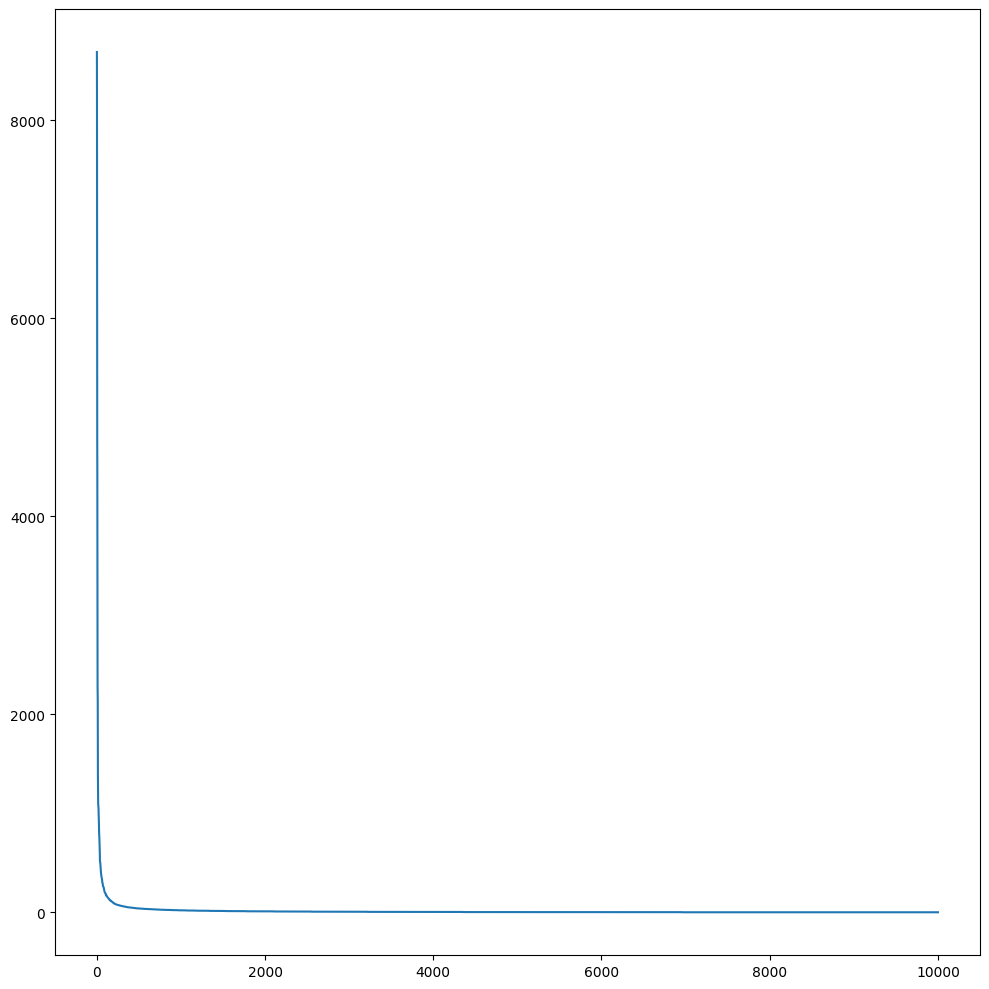

In [8]:
plt.rcParams["figure.figsize"] = [10.0, 10.0]
plt.rcParams["figure.autolayout"] = True
plt.plot(non_trimmed_x,non_trimmed_y)
plt.savefig("10000_most_common_non_trimmed.png")


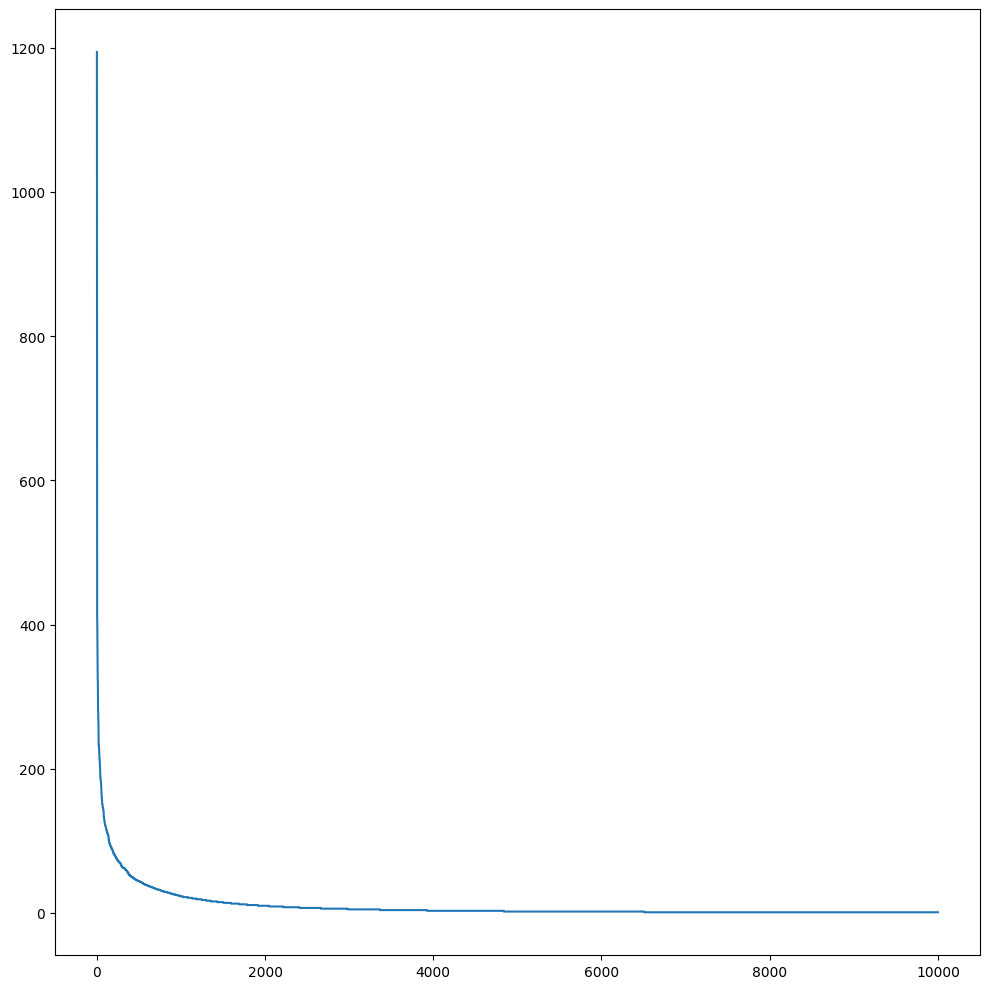

In [9]:
plt.rcParams["figure.figsize"] = [10.0, 10.0]
plt.rcParams["figure.autolayout"] = True
plt.plot(trimmed_x,trimmed_y)
plt.savefig("10000_most_common_trimmed.png") 

In [10]:
import sklearn
import numpy as np
import nltk
import pandas
import csv
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.lm import Vocabulary
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [11]:
file = open("data_post_split_00.csv")
reader = csv.reader(file)

text = []
for row in reader:
    text.append(row)


    
data = pandas.DataFrame(text)
array = data.to_numpy()

file.close()

print(array[0])

['' 'id' 'domain' 'type' 'url' 'content' 'scraped_at' 'inserted_at'
 'updated_at' 'title' 'authors' 'keywords' 'meta_keywords'
 'meta_description' 'tags' 'summary' 'source']


In [12]:
print(array[0])

test_array = np.delete(array, [0, 1, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16], 1)

print (test_array[0])

print(array.shape)
print(test_array.shape)

['' 'id' 'domain' 'type' 'url' 'content' 'scraped_at' 'inserted_at'
 'updated_at' 'title' 'authors' 'keywords' 'meta_keywords'
 'meta_description' 'tags' 'summary' 'source']
['domain' 'type' 'url' 'content' 'title']
(74147, 17)
(74147, 5)


In [13]:
def trim (string):
    stop_words = set(stopwords.words("english"))

    stop_symbols = '.,()[]"":;^?/&$\'’”“!–''``%—_'

    stemmer = SnowballStemmer("english")
    
    tokened_string = nltk.tokenize.word_tokenize(string)
    
    stopped_string = []
    
    for word in tokened_string:
        if (word not in stop_words and word not in stop_symbols):
            stopped_string.append(word)
    
    trimmed_string = [stemmer.stem(word) for word in stopped_string]
    
    return trimmed_string

In [14]:
def PreProsPipe (filename):
    file = open(filename)

    reader = csv.reader(file)

    text = []
    for row in reader:
        text.append(row)

    file.close()
    
    data = pandas.DataFrame(text)
    array = data.to_numpy()
    
    trimmed_array = np.delete(array, [0, 1, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16], 1)
    
    skip_head = 1
    
    reli_fake_array = []
    
    for elem in trimmed_array:
        if (skip_head == 1):
            skip_head = 2
        else:
            if (elem[3] is not None):
                elem[3] = trim(elem[3])
            else:
                elem[3] = ["None found"]
            if (elem[4] is not None):
                elem[4] = trim(elem[4])
            else:
                elem[4] = ["None found"]
            if (elem[1] == "reliable" or elem[1] == "political"):
                reli_fake_array.append("Trusted")
            else:
                reli_fake_array.append("Fake")
    
    print(trimmed_array[0])
    trimmed_array = np.delete(trimmed_array, [1], 1)
    print(trimmed_array[0])
    trimmed_array = np.delete(trimmed_array, 0, 0)
    print(trimmed_array[0])
    
    X, y = trimmed_array, reli_fake_array

    X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size= 0.2, train_size= 0.8, random_state= 0)

    X_test, X_val, y_test, y_val = train_test_split(X_inter, y_inter, test_size= 0.5, train_size= 0.5, random_state=0)       
    
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    y_val = np.asarray(y_val)
    
    print(X_train[0])
    
    return X_train, X_test, X_val, y_train, y_test, y_val

    

In [15]:
X_train, X_test, X_val, y_train, y_test, y_val = PreProsPipe("data_post_split_00.csv")

['domain' 'type' 'url' 'content' 'title']
['domain' 'url' 'content' 'title']
['express.co.uk'
 'https://www.express.co.uk/news/science/738402/life-an-ILLUSION-reality-does-not-exist-if-you-are-not-looking-at-it'
 list(['life', 'illus', 'least', 'quantum', 'level', 'theori', 'recent', 'confirm', 'set', 'research', 'they', 'final', 'mean', 'test', 'john', 'wheeler', 'delayed-choic', 'theori', 'conclud', 'physicist', 'right', 'in', '1978', 'mr', 'wheeler', 'propos', 'experi', 'involv', 'move', 'object', 'given', 'choic', 'act', 'like', 'wave', 'particl', 'former', 'act', 'vibrat', 'frequenc', 'distinguish', 'wave', 'latter', 'frequenc', 'determin', 'posit', 'space', 'unlik', 'wave', 'point', '‘', 'decid', 'act', 'like', 'one', 'at', 'time', 'technolog', 'avail', 'conduct', 'strong', 'experi', 'scientist', 'abl', 'carri'])
 list(['is', 'life', 'illus', 'research', 'prove', 'realiti', "n't", 'exist', 're', 'look'])]
['barenakedislam.com'
 'http://barenakedislam.com/2017/10/18/minnesotastan-

In [16]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
y_val = np.asarray(y_val)

In [17]:
X_train_content = np.delete(X_train, [0, 1, 3], 1)
X_test_content = np.delete(X_test, [0, 1, 3], 1)
X_val_content = np.delete(X_val, [0, 1, 3], 1)

In [18]:
def unpack (array):
    list = array.tolist()
    flat_list = []
    for item in list:
        flat_string = ""
        for unpack in item:
            for word in unpack:
                flat_string = flat_string + " " + word
        flat_list.append(flat_string)
        
    return flat_list

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB

vec = CountVectorizer()

X_train_unpacked = unpack(X_train_content)
X_test_unpacked = unpack(X_test_content)
X_val_unpacked = unpack(X_val_content)

X_train_bagged = vec.fit_transform(X_train_unpacked)
X_test_bagged = vec.transform(X_test_unpacked)
X_val_bagged = vec.transform(X_val_unpacked)

In [2]:
nb = MultinomialNB()
nb.fit(X_train_bagged, y_train)

preds = nb.predict(X_test_bagged)
print(classification_report(y_test, preds))

NameError: name 'MultinomialNB' is not defined

In [21]:
def unpack_advanced(array):
    list = array.tolist()
    bags_list = []
    for item in list:
        print(type(item))
        for string in item:
            print(type(string))
            
        break


In [1]:
test = bag_it_up_train(X_train)
print(X_train.tolist()[0][3])

NameError: name 'bag_it_up_train' is not defined

In [ ]:
from sklearn import svm

model = svm.SVC()


In [ ]:
print(np.asarray(X_train_unpacked).shape)